In [6]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
X = [np.load('../data/X_1week.pkl').reshape(33400,6)]
for num_weeks in range(2,7):
    X.append(np.load('../data/X_' + str(num_weeks) + 'week.pkl').reshape(33400,num_weeks*6))
y = np.load('../data/y.pkl')


# Train test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X[2], y, test_size=0.4,random_state=0)

# Scale
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.fit_transform(X_test)

# Train the classifier
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)

# Predict on testing data
y_pred = clf.predict(X_test) 

Confusion matrix, without normalization
[[10287    91   137]
 [   89   277   398]
 [   57    64  1960]]
Normalized confusion matrix
[[ 0.98  0.01  0.01]
 [ 0.12  0.36  0.52]
 [ 0.03  0.03  0.94]]


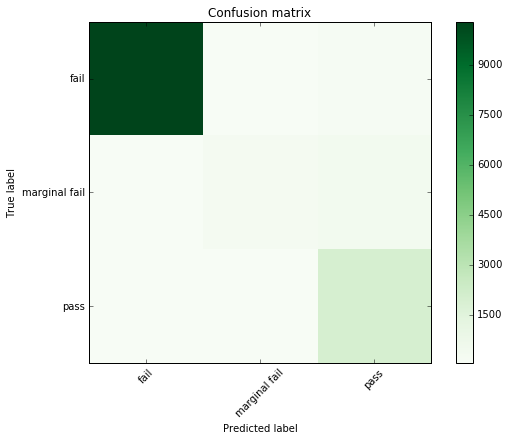

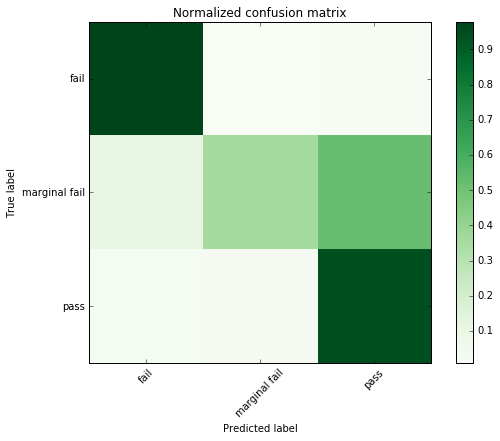

In [13]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
confusion_matrix(y_test, y_pred,labels=['fail','marginal fail','pass'])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(['fail','marginal fail','pass']))
    plt.xticks(tick_marks, ['fail','marginal fail','pass'], rotation=45)
    plt.yticks(tick_marks, ['fail','marginal fail','pass'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
